In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.max_rows = 7
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

In [6]:
weather_2012 = pd.read_csv(r'C:\Users\Lenovo\Desktop\yobanoye\weather_2012.csv', parse_dates=True, index_col=r'Date/Time (LST)')

In [26]:
weather_description = weather_2012['Weather']
is_snowing = weather_description.str.contains('Snow')
is_snowing = is_snowing.astype(int)

<Axes: xlabel='Date/Time (LST)'>

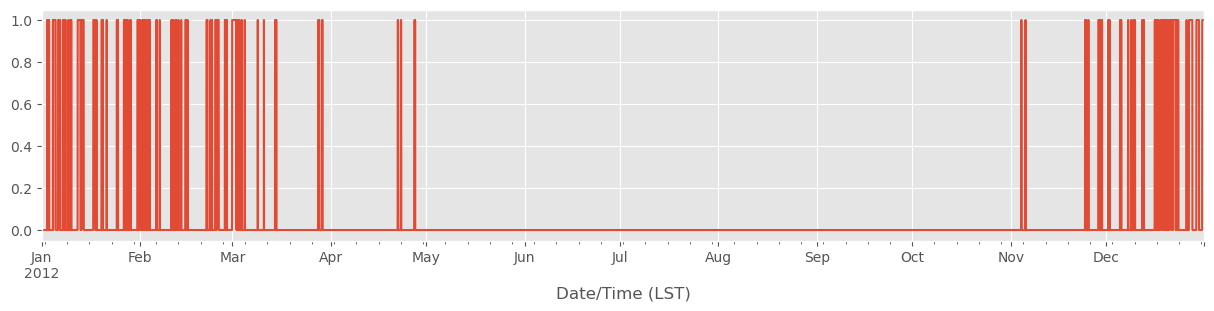

In [27]:
is_snowing.plot()

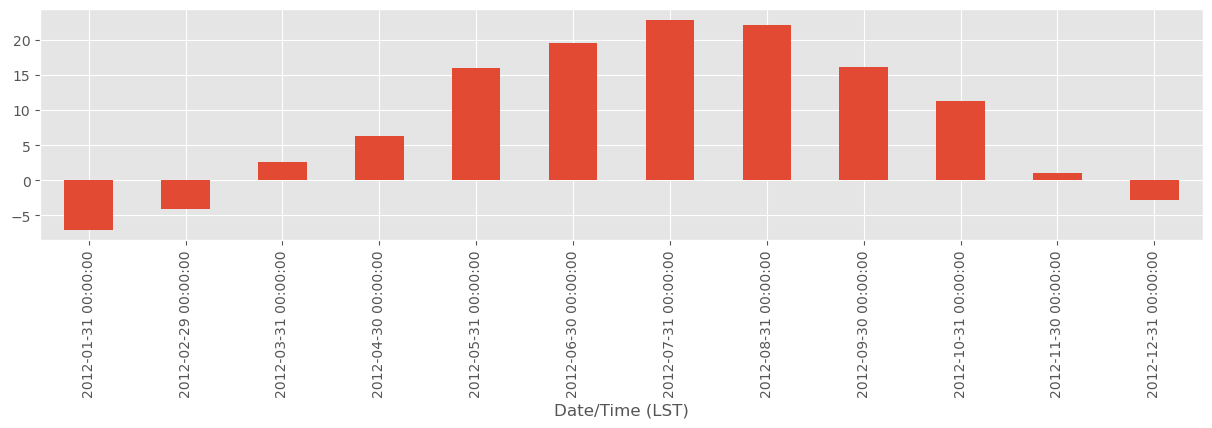

In [30]:
temperature = weather_2012[r'Temp (°C)'].resample('M').median().plot(kind='bar')

<Axes: xlabel='Date/Time (LST)'>

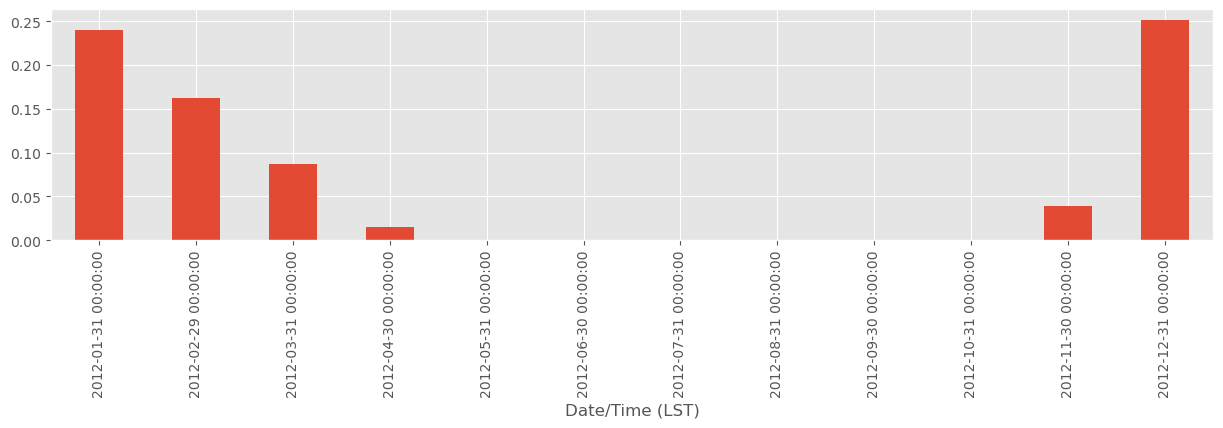

In [29]:
is_snowing.resample('M').mean().plot(kind='bar')

In [33]:
temperature = weather_2012[r'Temp (°C)'].resample('M').median()
is_snowing = weather_2012['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(int).resample('M').mean()

temperature.name = "Temperature"
snowiness.name = "Snowiness"

In [34]:
stats = pd.concat([temperature, snowiness], axis=1)
stats

,Temperature,Snowiness
Date/Time (LST),,
2012-01-31,-7.05,0.240591
2012-02-29,-4.10,0.162356
2012-03-31,2.60,0.087366
...,...,...
2012-10-31,11.30,0.000000
2012-11-30,1.05,0.038889
2012-12-31,-2.85,0.251344


array([<Axes: title={'center': 'Temperature'}, xlabel='Date/Time (LST)'>,
       <Axes: title={'center': 'Snowiness'}, xlabel='Date/Time (LST)'>],
      dtype=object)

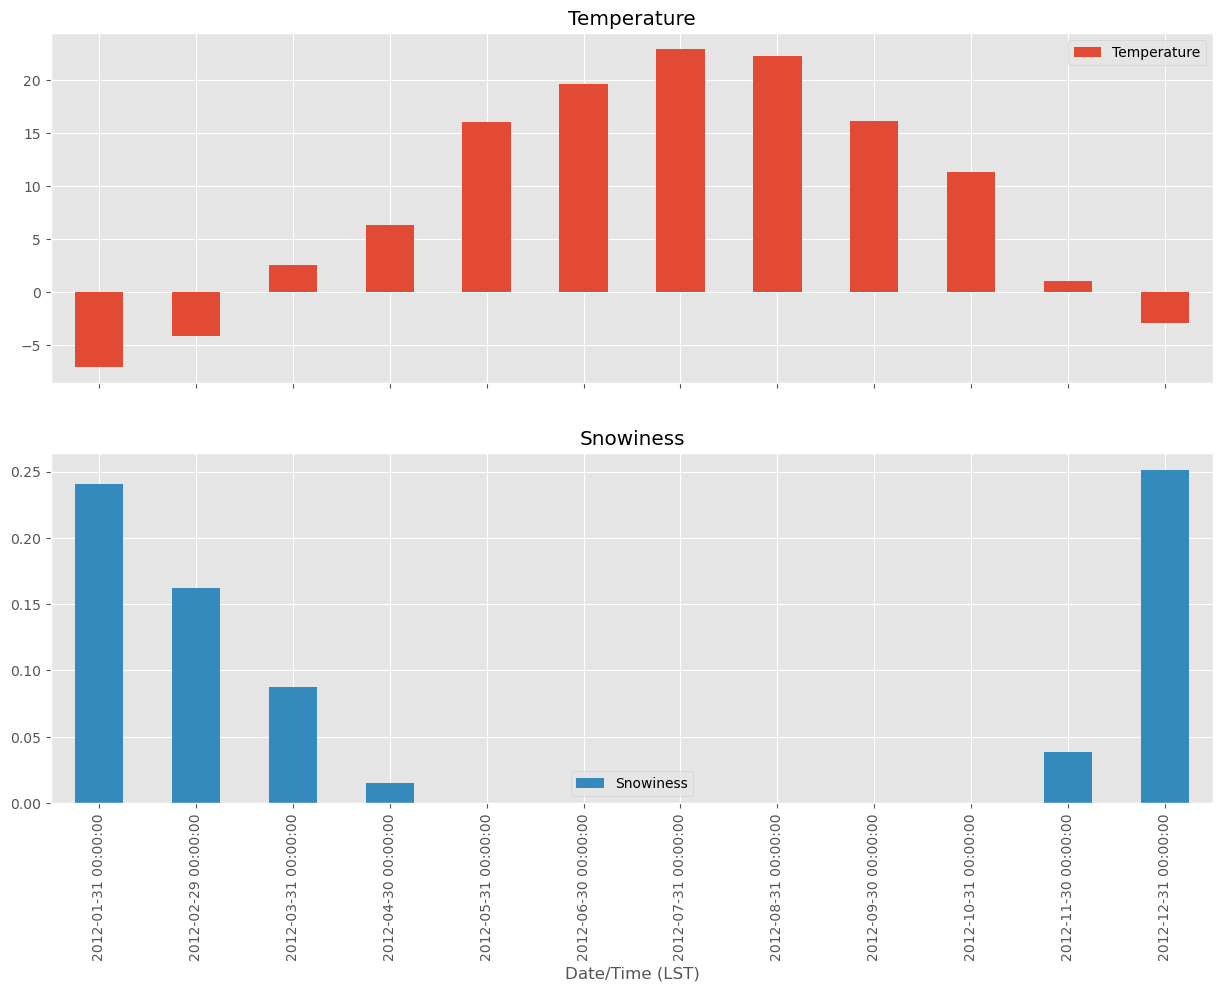

In [36]:
stats.plot(kind='bar', subplots=True, figsize=(15, 10))